#**¿Regresión logística, bosque aleatorio o KNN?**
###**Tarea**
Utilizando el wine cultivars dataset de la sección de clasificación multiclase, tu tarea es utilizar modelos de regresión logística (uno frente a uno y uno frente a todos) y ajustarlos para su rendimiento óptimo. También debes intentar comparar el efecto de cuando intentas utilizar la regularización l1 y l2. Esta es una gran oportunidad para ver qué sucede cuando intentas ajustar un modelo. Después de hacer eso, intenta usar los modelos KNN, Bagged tree y Random Forest.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier



In [2]:
col_names = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']

In [3]:
df=pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Track Machine Learning I/Introducción to Machine Learning/Regresión Logística/wine.data', header = None,names = col_names)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df['Class label'].value_counts(dropna = False)

2    71
1    59
3    48
Name: Class label, dtype: int64

In [7]:
X = df.loc[:, df.columns[(df.columns != 'Class label')]]
y = df.loc[:, 'Class label'].values

In [8]:

X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [9]:
#Cantidad de observaciones por clase en el conjunto de datos train
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1: 41, 2: 50, 3: 33}

In [10]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar  transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##**Regresión logistica: OVR-l1**

In [11]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


##**Regresión logistica: OVO-l1**

In [12]:
log_reg = OneVsOneClassifier(LogisticRegression(penalty='l1', C=1.0,solver='liblinear')).fit(X_train, y_train)

print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


##**Regresión logistica: OVR-l2**

In [13]:
log_reg = LogisticRegression(penalty='l2',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


##**Regresión logistica: OVO-l2**

In [14]:
log_reg = OneVsOneClassifier(LogisticRegression(penalty='l2', C=1.0,solver='liblinear')).fit(X_train, y_train)

print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.9919354838709677
Test accuracy: 1.0


##**KNN clasificación**

In [15]:
#importar el modelo de datos
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#crear instancia del modelo
knn = KNeighborsClassifier(n_neighbors=4)

In [17]:
#entrenar el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
#Score
knn.score(X_train, y_train)

0.9596774193548387

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
clf = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [22]:
clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [24]:
clf.predict(X_test)

array([1, 2, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 3, 1, 3, 3, 1, 1, 3, 2, 1, 3,
       2, 2, 2, 2, 1, 3, 3, 2, 1, 3, 1, 2, 2, 1, 2, 1, 1, 3, 3, 2, 2, 2,
       1, 2, 2, 3, 2, 3, 2, 2, 1, 1])

In [25]:
# calcular la precisión de clasificación para el modelo que se entrenó
score = clf.score(X_test, y_test)
score

1.0

In [26]:
pd.DataFrame(y_train)[0].value_counts(dropna = False)

2    50
1    41
3    33
Name: 0, dtype: int64

In [28]:
clf.oob_score_

0.9596774193548387

In [29]:
# List of values to try for n_estimators:
estimator_range = [1] + list(range(10, 310, 10))

In [30]:
estimator_range

[1,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300]

In [31]:
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
# Use la división entrenamiento prueba con cada valor de n_estimators (Advertencia: ¡Lento!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator,
                                 random_state=1,
                                 bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

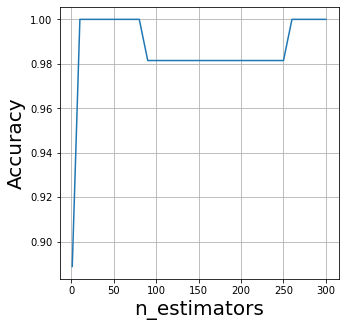

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

Todos los modelos tienen un rendimiento parecido, no obstante, el modelo que más me agrada es el logit, ya que en ese modelo es más fácil identificar la dirección que tiene cada variable para el resultado, y a su vez ver cuál aporta más para la clasificación.